In [74]:
from torch.utils.data import DataLoader
import torch.nn.functional as F
import torch
from torchvision import datasets
from torchvision.transforms import ToTensor
import torch.nn as nn
import matplotlib.pyplot as plt
from IPython.display import Image, Math

model = nn.Sequential(nn.Linear(784, 512),
                      nn.ReLU(),
                      nn.Linear(512, 64),
                      nn.ReLU(),
                      nn.Linear(64, 10))
model.train()
working_set = datasets.MNIST(
    root='data',
    train=True,
    transform=ToTensor(),
    download=True,
)

dataloader = DataLoader(working_set, batch_size=1, shuffle=False)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3, weight_decay=1e-5)

Train the machine one step
Input


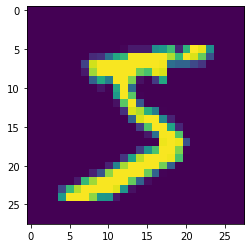

In [75]:
print("Train the machine one step")
optimizer.zero_grad()
x, y_true = next(iter(dataloader))
print("Input")
plt.imshow(x.reshape(28,28))
x = x.reshape(x.shape[0], -1)

In [76]:
actual_output = y_true[0].item()
print("\n\nActual Output")
print(actual_output)



Actual Output
5


In [77]:
model_output = model(x)
for i in range(model_output.shape[1]):
    print(f"Output for {i}: {model_output[0][i]} {'---(Actual)' if i==actual_output else ''}")

Output for 0: 0.040161795914173126 
Output for 1: -0.09824703633785248 
Output for 2: 0.05715511739253998 
Output for 3: -0.07902190089225769 
Output for 4: 0.08404043316841125 
Output for 5: 0.0476258285343647 ---(Actual)
Output for 6: -0.09312647581100464 
Output for 7: 0.008346542716026306 
Output for 8: -0.0012514442205429077 
Output for 9: -0.011150762438774109 


In [78]:
print("We transform these outputs as probability using softmax")
display(Math(r'softmax(output_i) = \frac{e^{output_i}}{\sum_{j}^{ }e^{output_j}}'))

We transform these outputs as probability using softmax


<IPython.core.display.Math object>

In [79]:
exp = torch.exp(model_output)
exp_actual = exp[0][actual_output]
display(Math(r'e^{output_i}\ ='))
print(f"{exp_actual:.2f}")

<IPython.core.display.Math object>

1.05


In [80]:
sum_exp_outputs = torch.sum(torch.exp(model_output)).item()
display(Math(r'\sum_{j}^{ }e^{output_j}\ ='))
print(f"{sum_exp_outputs:.2f}")

<IPython.core.display.Math object>

9.97


In [81]:
str = f"softmax(output_{actual_output})" + r'= \frac{e^{'+f"output_{actual_output}"+' }}{\sum_{j}^{ }e^{output_j}} ='
display(Math(str))
softmax_actual = exp_actual/sum_exp_outputs
print(f"{softmax_actual:.2f}")

<IPython.core.display.Math object>

0.11


In [82]:
print("Loss")
display(Math(r"loss = -\sum{p(x)*\log(q(x))}"))
display(Math(r"p(x): Actual\ probability"))
display(Math(r"q(x): Predicted\ probability"))

Loss


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [83]:
print(f"Since all p(x)=0 except for x is not {actual_output}, and p(x) =1 where x is {actual_output}, loss becomes:")
display(Math(r"loss = -\log(q(x))\ [x\ is\ 5]"))

Since all p(x)=0 except for x is not 5, and p(x) =1 where x is 5, loss becomes:


<IPython.core.display.Math object>

In [84]:
log_softmax = torch.log(softmax_actual)
print(f"So, Calculated LogSoftmax for the case in concern is: {log_softmax:.2f}")

So, Calculated LogSoftmax for the case in concern is: -2.25


In [85]:
log_softmax_pytorch_for_all = F.log_softmax(model_output, dim=1)
log_softmax_pytorch = log_softmax_pytorch_for_all[0][actual_output]
print(f"Verify. LogSoftmax calculated by PyTorch {log_softmax_pytorch:.2f}")

Verify. LogSoftmax calculated by PyTorch -2.25


In [86]:
loss = -log_softmax
print(f"So, Calculated loss is: {loss:.2f}")

So, Calculated loss is: 2.25


In [88]:
loss = F.nll_loss(log_softmax_pytorch_for_all, y_true)
print(f"So, Loss calculated by PyTorch: {loss:.2f}")

So, Loss calculated by PyTorch: 2.25
